<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [52]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [53]:
boston_df=pd.read_csv(boston_url)
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**Visualization 1**


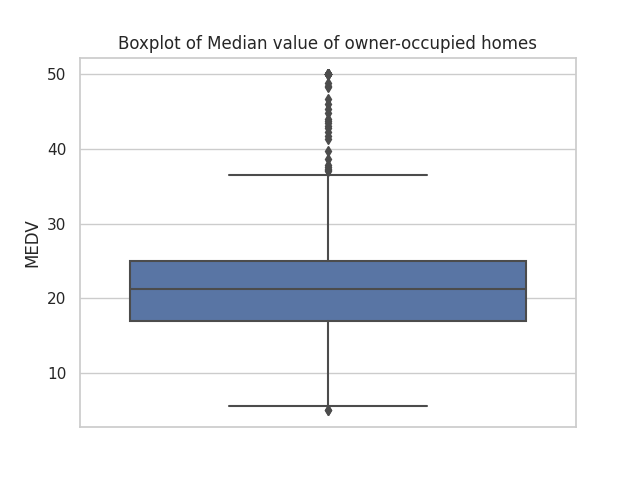

In [43]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("Boxplot of Median value of owner-occupied homes")
pyplot.show()

We see the median median value at about 21K. A lot of outliers above around 31K.

**Visualization 2**


In [23]:
charles = boston_df.groupby('CHAS').count().reset_index()
print(charles)

   CHAS  Unnamed: 0  CRIM   ZN  INDUS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO  \
0   0.0         471   471  471    471  471  471  471  471  471  471      471   
1   1.0          35    35   35     35   35   35   35   35   35   35       35   

   LSTAT  MEDV  
0    471   471  
1     35    35  


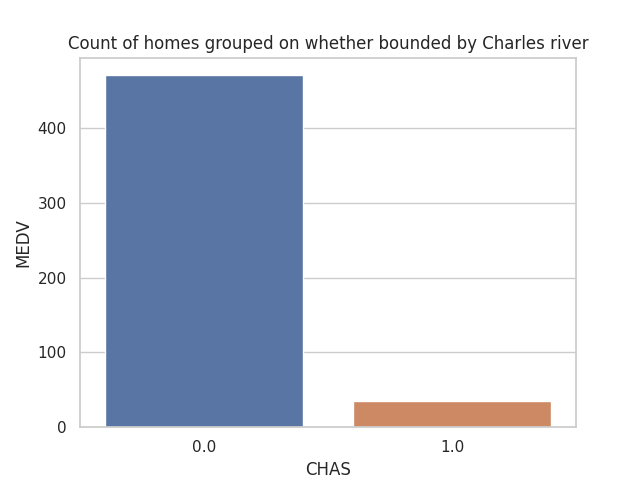

In [44]:
sns.set(style="whitegrid")
ax = sns.barplot(x='CHAS', y='MEDV', data=charles)
pyplot.title("Count of homes grouped on whether bounded by Charles river")
pyplot.show()

We see that most houses are not bounded by the Charles river.

**Visualization 3**


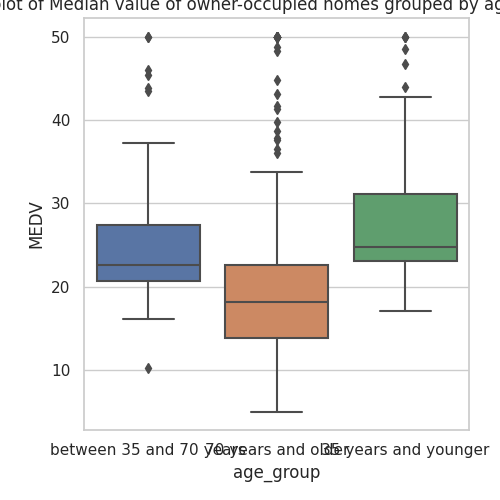

In [67]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.title("Boxplot of Median value of owner-occupied homes grouped by age category")
pyplot.show()

Interestingly, young and old people live in more valuable houses than people in the middle group (35-70). This middle group has a lot of high outliers however.

**Visualization 4**


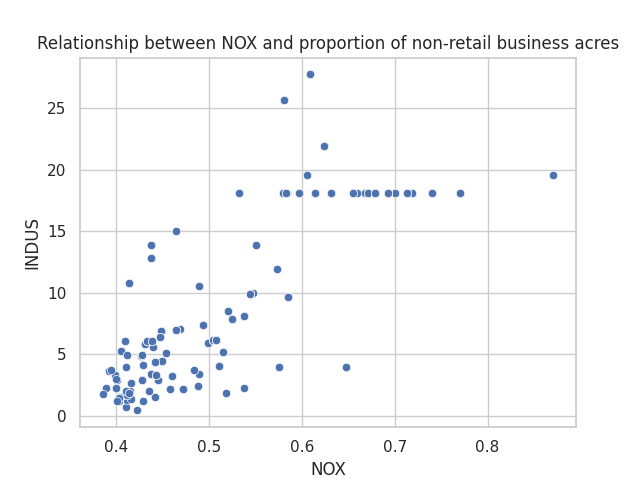

In [49]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Relationship between NOX and proportion of non-retail business acres")
pyplot.show()

We see a positive, quite linear relationship between the nitric oxides concentration and the proportion of non-retail business acres per town.

**Visualization 5**


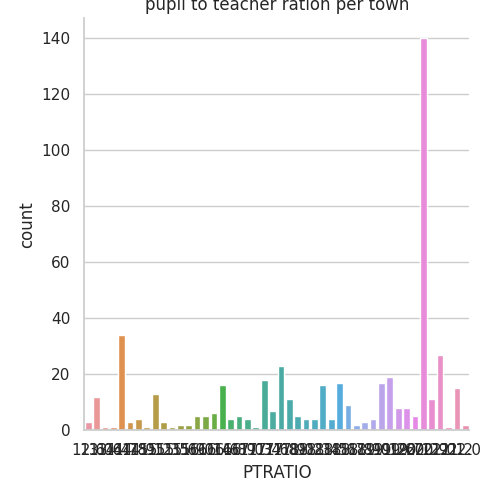

In [65]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
pyplot.title("pupil to teacher ration per town")
pyplot.show()

One town has by far the most pupils per teacher. One should probably not move there.

**Test 1**


State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("There is no difference in Median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a difference in Median value of houses bounded by the Charles river")


We can plot the dependent variable with a histogram

<ipython-input-10-84deee6f8aa7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


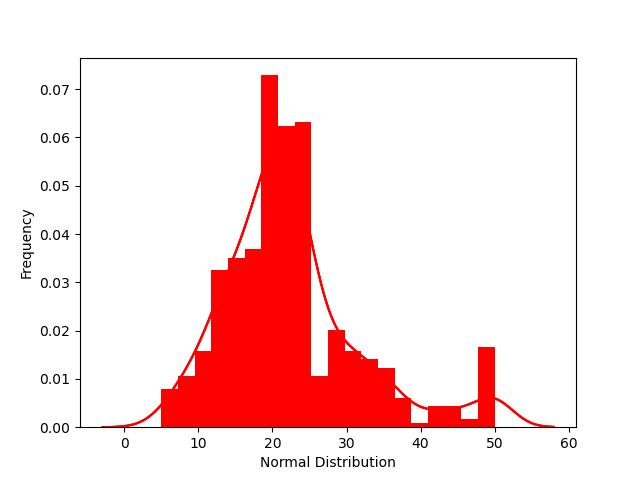

In [10]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
pyplot.show()
## we can assume it is normal

We can use the Levene's Test in Python to check test significance


In [11]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we cannot assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398285)

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of houses based on whether they are bounded by the Charles river.


**Test 2**


State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means (median values of houses) are equal for each age group)
*   $H\_1:$ At least one of the means differ


In [68]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

P value is greater than 0.05, the variances are equal.

In [69]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [70]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differs.


**Test 3**


State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations are correlated with proportion of non-retail business acres per town


In [71]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between NOX concentrations and proportion of non-retail business acres per town.


**Test 4**


State the hypothesis:

*   $H\_0: β1$ = 0 (Weighted distance to five Boston employment centres has no effect on median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (Weighted distance to five Boston employment centres has an effect on median value of owner occupied homes)


In [72]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        10:49:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p value is lower than 0.05. We conclude that an increment of 1 additional weighted distance to the five Boston employment centres leads to 1091.6 dollars of added value to the median value of owner occupied homes.
